# Библиотеки Python для DS
## Урок 1. Первичный и визуальный анализ данных

Исследование данных о качестве вина (Wine Quality Dataset), используйте данные по белым и красным винам:

— Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

— Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

— Постройте столбчатые диаграммы для анализа распределения категориальных переменных.

— Сделайте выводы о качестве данных и потенциальных взаимосвязях.

In [85]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

 Input variables (based on physicochemical tests):

Входные переменные (на основе физико-химических тестов):
   1. **fixed acidity** - Фиксированная кислотность: Это мера общей кислотности вина, которая остается неизменной после брожения. Она определяется путем измерения общего количества кислот, присутствующих в вине.
   2.  **volatile acidity** - Летучая кислотность: Это мера кислотности, которую можно обнаружить при помощи обоняния. Обычно она связана с наличием уксусной кислоты в вине.
   3.  **citric acid** - Лимонная кислота: Это одна из основных органических кислот, присутствующих в вине. Она влияет на вкус и баланс вина.
   4.  **residual sugar** - Остаточный сахар: Это количество сахара, которое остается в вине после процесса ферментации. Оно может влиять на сладость вина.
   5.  **chlorides** - Хлориды: Это ионы хлора, которые могут влиять на минеральность вкуса вина.
   6.  **free sulfur dioxide** - Свободный диоксид серы: Это диоксид серы, который присутствует в вине в свободной форме. Он используется в качестве консерванта и может влиять на стабильность вина.
   7.  **total sulfur dioxide** - Общий диоксид серы: Это общее количество диоксида серы, присутствующего в вине, включая связанную форму.
   8.  **density** - Плотность: Это мера массы вина по отношению к массе воды. Она может использоваться для определения содержания алкоголя в вине.
   9.  **pH** - рН: Это мера кислотности вина, которая показывает концентрацию ионов водорода в растворе.
   10. **sulphates** - Сульфаты: Это соли серной кислоты, которые могут влиять на вкус и стабильность вина.
   11.  **alcohol** - Алкоголь: Это содержание этилового спирта в вине, которое определяет его крепость.

   Output variable (based on sensory data):
   12.  **quality** (score between 0 and 10) - субъективная оценка качества вина.

In [89]:
df_red = pd.read_csv('winequality-red.csv', delimiter=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
df_white = pd.read_csv('winequality-white.csv', delimiter=";")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

In [10]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


1. Данные состоят из 1599 наблюдений (строк) для красного вина и 4898 наблюдений (строк) для белого вина.
2. Для всех вин указанно 12 переменных (столбцов).
3. Все переменные, кроме 'quality', имеют тип данных float64, что указывает на то, что они имеют непрерывные значения.
4. Переменная 'quality' имеет тип int64, что означает, что она содержит категориальные значения.
4. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (1599/4898).
5. Переменная 'quality' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.  

In [92]:
df_white.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Преобразуем переменную quality в тип object

In [17]:
df_red['quality'] = df_red['quality'].astype('object')
df_white['quality'] = df_white['quality'].astype('object')
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [18]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [22]:
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


На основе представленных статистических данных можно сделать следующие выводы для различных химических параметров красного вина, измеренных на 1599 образцах.

Вот некоторые выводы из этих данных:

1. **Фиксированная кислотность (fixed acidity):**
   - Среднее значение: 8.32 г/л.
   - Значительное стандартное отклонение (1.74) указывает на разнообразие уровней кислотности.
   - Размах значений от 4.6 до 15.9 г/л, что свидетельствует о значительном различии в кислотности между образцами.

2. **Летучая кислотность (volatile acidity):**
   - Среднее значение: 0.53 г/л.
   - Низкое стандартное отклонение (0.18) указывает на меньшее разброс значений.
   - Значения варьируются от 0.12 до 1.58 г/л.

3. **Лимонная кислота (citric acid):**
   - Среднее значение: 0.27 г/л.
   - Высокое стандартное отклонение (0.19), что указывает на существенное разнообразие уровней лимонной кислоты в образцах.
   - Некоторые образцы вообще не содержат лимонной кислоты (мин. значение 0.0 г/л).

4. **Остаточный сахар (residual sugar):**
   - Среднее значение: 2.54 г/л.
   - Значительное стандартное отклонение (1.41) и широкий диапазон (от 0.9 до 15.5 г/л), что указывает на значительное разнообразие в содержании сахара.

5. **Хлориды (chlorides):**
   - Среднее значение: 0.087 г/л.
   - Низкое стандартное отклонение (0.047), что указывает на относительно стабильный уровень хлоридов.
   - Размах значений от 0.012 до 0.611 г/л.

6. **Свободный диоксид серы (free sulfur dioxide):**
   - Среднее значение: 15.87 мг/л.
   - Высокое стандартное отклонение (10.46), указывающее на значительные различия в содержании свободного SO2.
   - Значения варьируются от 1 до 72 мг/л.

7. **Общий диоксид серы (total sulfur dioxide):**
   - Среднее значение: 46.47 мг/л.
   - Очень высокое стандартное отклонение (32.90), что свидетельствует о значительном разбросе.
   - Диапазон от 6 до 289 мг/л, что указывает на широкий спектр содержания SO2.

8. **Плотность (density):**
   - Среднее значение: 0.99675 г/см³.
   - Очень низкое стандартное отклонение (0.00189), указывающее на стабильность плотности.
   - Значения варьируются от 0.99007 до 1.00369 г/см³.

9. **pH:**
   - Среднее значение: 3.31.
   - Низкое стандартное отклонение (0.15), что указывает на относительно стабильный уровень pH.
   - Диапазон значений от 2.74 до 4.01.

10. **Сульфаты (sulphates):**
    - Среднее значение: 0.66 г/л.
    - Стандартное отклонение 0.17, указывающее на некоторое разнообразие.
    - Значения варьируются от 0.33 до 2.0 г/л.

11. **Алкоголь (alcohol):**
    - Среднее значение: 10.42% об.
    - Стандартное отклонение 1.07, что указывает на разнообразие уровня алкоголя.
    - Диапазон значений от 8.4 до 14.9%.

In [23]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


На основе представленных статистических данных можно сделать следующие выводы для различных химических параметров белого вина, измеренных на 4898 образцах.

Вот некоторые выводы из этих данных:

1. **Фиксированная кислотность (fixed acidity):**
   - Среднее значение: 6.85 г/л.
   - Низкое стандартное отклонение (0.84) указывает на относительно небольшой разброс значений.
   - Размах значений от 3.8 до 14.2 г/л, что свидетельствует о некотором различии в кислотности между образцами.

2. **Летучая кислотность (volatile acidity):**
   - Среднее значение: 0.28 г/л.
   - Низкое стандартное отклонение (0.10), что указывает на меньший разброс значений.
   - Значения варьируются от 0.08 до 1.10 г/л.

3. **Лимонная кислота (citric acid):**
   - Среднее значение: 0.33 г/л.
   - Относительно низкое стандартное отклонение (0.12), что указывает на некоторую стабильность уровней лимонной кислоты в образцах.
   - Некоторые образцы вообще не содержат лимонной кислоты (мин. значение 0.0 г/л).

4. **Остаточный сахар (residual sugar):**
   - Среднее значение: 6.39 г/л.
   - Значительное стандартное отклонение (5.07) и широкий диапазон (от 0.6 до 65.8 г/л), что указывает на значительное разнообразие в содержании сахара.

5. **Хлориды (chlorides):**
   - Среднее значение: 0.046 г/л.
   - Низкое стандартное отклонение (0.022), что указывает на относительно стабильный уровень хлоридов.
   - Размах значений от 0.009 до 0.346 г/л.

6. **Свободный диоксид серы (free sulfur dioxide):**
   - Среднее значение: 35.31 мг/л.
   - Высокое стандартное отклонение (17.01), указывающее на значительные различия в содержании свободного SO2.
   - Значения варьируются от 2 до 289 мг/л.

7. **Общий диоксид серы (total sulfur dioxide):**
   - Среднее значение: 138.36 мг/л.
   - Высокое стандартное отклонение (42.50), что свидетельствует о значительном разбросе.
   - Диапазон от 9 до 440 мг/л, что указывает на широкий спектр содержания SO2.

8. **Плотность (density):**
   - Среднее значение: 0.994 г/см³.
   - Низкое стандартное отклонение (0.00299), указывающее на стабильность плотности.
   - Значения варьируются от 0.987 до 1.039 г/см³.

9. **pH:**
   - Среднее значение: 3.19.
   - Низкое стандартное отклонение (0.15), что указывает на относительно стабильный уровень pH.
   - Диапазон значений от 2.72 до 3.82.

10. **Сульфаты (sulphates):**
    - Среднее значение: 0.49 г/л.
    - Относительно низкое стандартное отклонение (0.11), что указывает на стабильность содержания сульфатов.
    - Значения варьируются от 0.22 до 1.08 г/л.

11. **Алкоголь (alcohol):**
    - Среднее значение: 10.51% об.
    - Стандартное отклонение 1.23, что указывает на разнообразие уровня алкоголя.
    - Диапазон значений от 8.0 до 14.2%.

Эти данные показывают, что хотя некоторые параметры, такие как плотность и pH, относительно стабильны, другие, такие как общий диоксид серы и остаточный сахар, демонстрируют значительное разнообразие среди образцов как белого так и красного вина.

Сравнивая описательную статистику для двух таблиц, представляющих химические параметры красного и белого вина, можно сделать следующие выводы:

1. **Кислотность и сахар**: Красное вино в среднем имеет более высокую фиксированную и летучую кислотность, в то время как белое вино имеет более высокое содержание остаточного сахара.
2. **Содержание диоксида серы**: Белое вино содержит значительно больше свободного и общего диоксида серы.
3. **Плотность и pH**: Красное вино имеет чуть более высокую плотность и pH.
4. **Минеральное содержание**: Красное вино имеет больше хлоридов и сульфатов.
5. **Алкоголь**: Уровень алкоголя в среднем одинаковый для обоих типов вина.

## Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

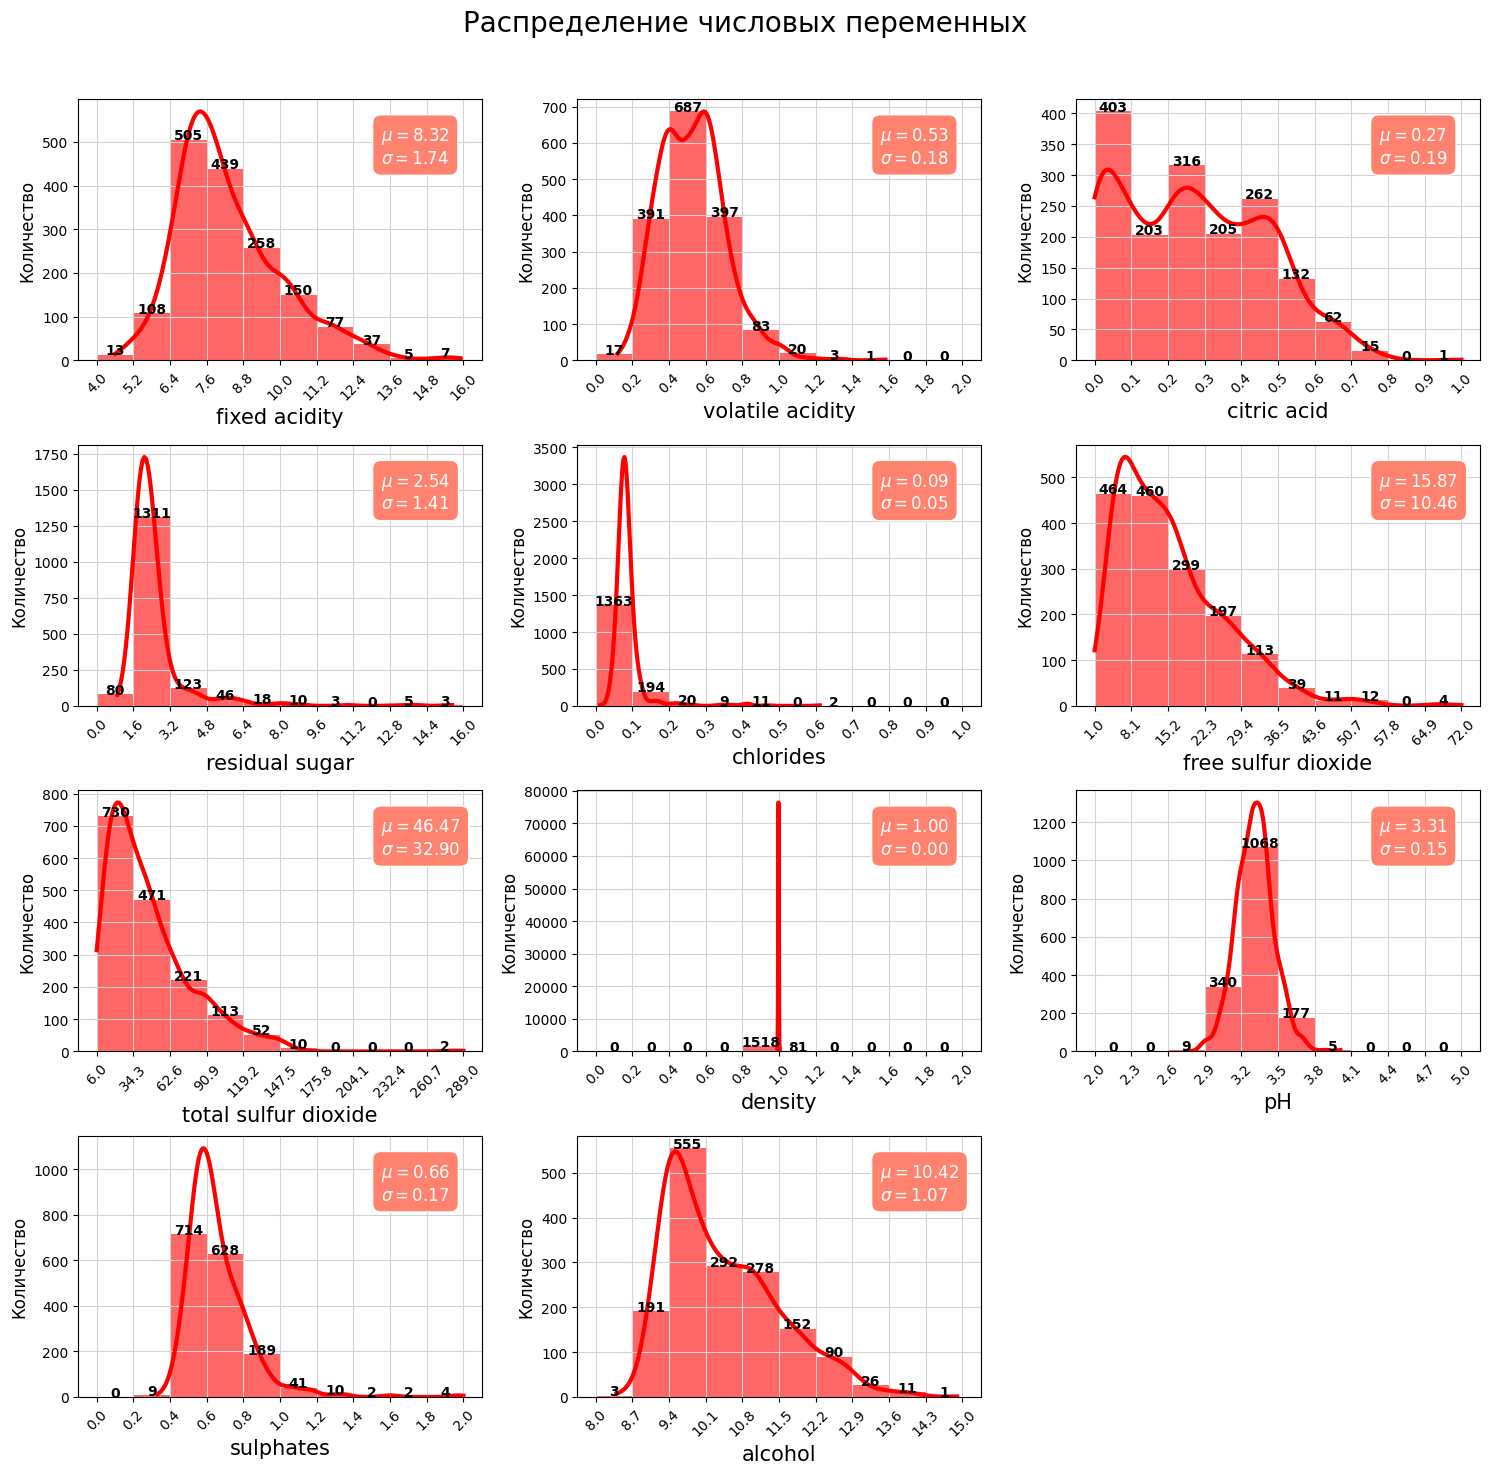

In [39]:
# Фильтруем только числовые столбцы
numerical_cols = df_red.select_dtypes(include=[np.number]).columns

# Определяем количество строк и столбцов подграфиков для 11 графиков
nrows = 4
ncols = 3
num_plots = len(numerical_cols)

# Создаем подграфики
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(numerical_cols):
    x = i // ncols
    y = i % ncols

    values, bin_edges = np.histogram(df_red[col].dropna(),
                                     range=(np.floor(df_red[col].min()), np.ceil(df_red[col].max())))

    graph = sns.histplot(data=df_red, x=col, bins=bin_edges, ax=ax[x, y],
                         edgecolor='none', color='red', kde=True, alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red[col].mean(),
        r'$\sigma=%.2f$' % df_red[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Отключаем оставшиеся пустые подграфики
for i in range(num_plots, nrows * ncols):
    x = i // ncols
    y = i % ncols
    ax[x, y].axis('off')

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

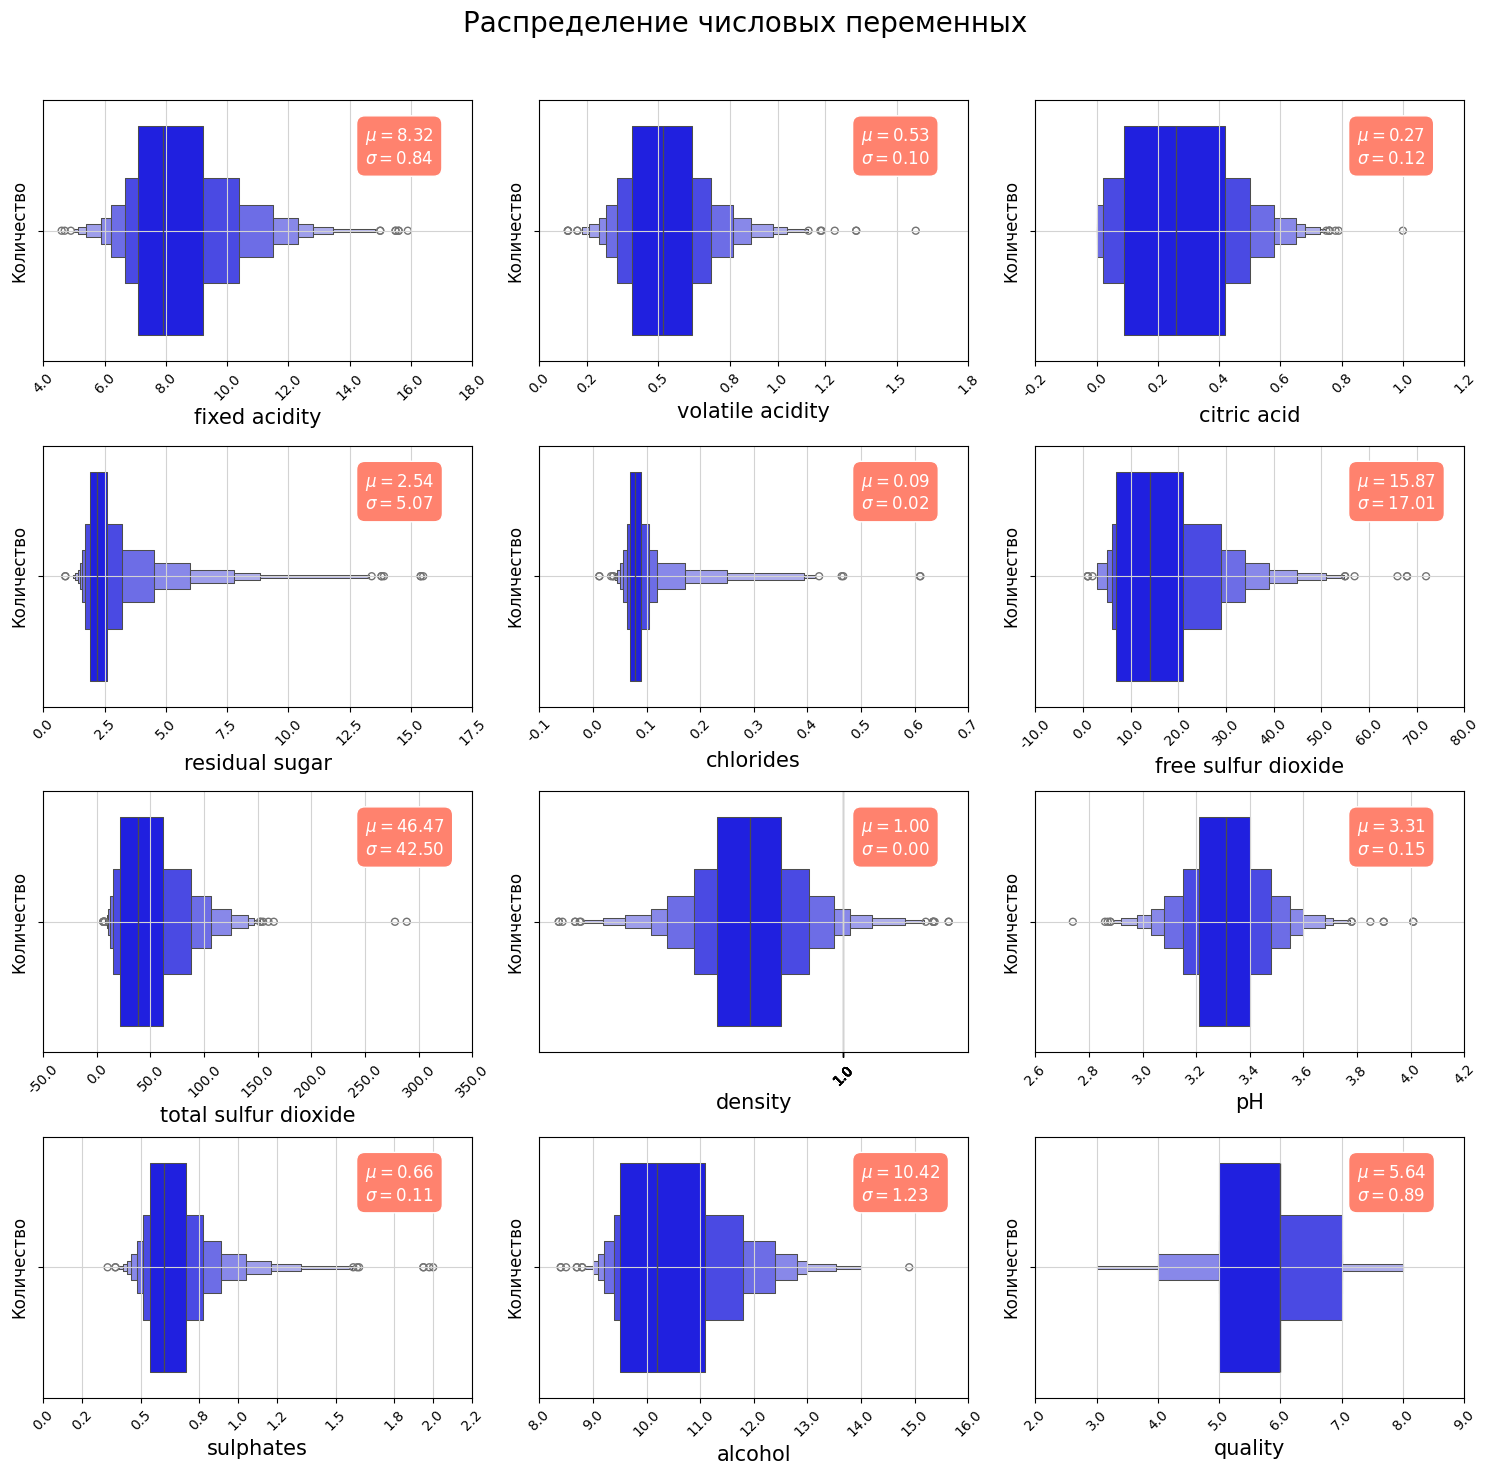

In [46]:
# Определяем количество строк и столбцов подграфиков для 12 графиков
nrows = 4
ncols = 3
num_plots = len(df_white.columns)

# Создаем подграфики
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_red.columns):
    x = i // ncols
    y = i % ncols

    graph = sns.boxenplot(data=df_red, x=col, ax=ax[x, y], color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)

    # Обновление меток оси X
    xticks = ax[x, y].get_xticks()
    if len(xticks) > 0 and isinstance(xticks[0], (int, float)):
        rounded_xticks = np.round(xticks, 1)
        ax[x, y].set_xticks(rounded_xticks)
        ax[x, y].set_xticklabels(rounded_xticks, rotation=45)

    ax[x, y].grid(color='lightgrey')

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red[col].mean(),
        r'$\sigma=%.2f$' % df_white[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Отключаем оставшиеся пустые подграфики
for i in range(num_plots, nrows * ncols):
    x = i // ncols
    y = i % ncols
    ax[x, y].axis('off')

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

###Выводы:
Для большинства признаков (например, fixed acidity, volatile acidity, chlorides, density, pH) среднее и медиана близки друг к другу, что указывает на симметричное распределение, характерное для нормального распределения.


Признаки, такие как residual sugar, показывают значительные выбросы и положительную асимметрию, что указывает на отклонения от нормального распределения.


Стандартное отклонение большинства признаков указывает на компактные распределения, кроме residual sugar, free sulfur dioxide и total sulfur dioxide, которые имеют более широкие распределения.

In [47]:
#df_wine = pd.merge(df_red, df_white, how='outer')

In [48]:
#df_wine.info()

### Постройте столбчатые диаграммы для анализа распределения категориальных переменных.


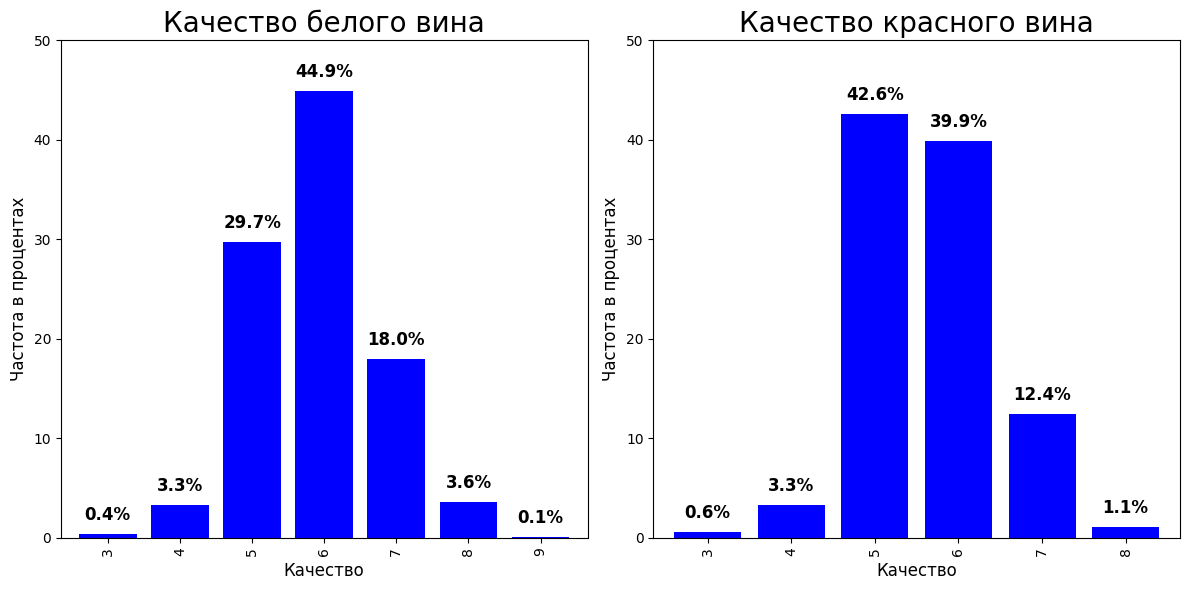

In [74]:
# Список наборов данных
datasets = [df_white, df_red]

# Создание фигуры и осей
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Цикл по наборам данных
for i, df in enumerate(datasets):
    ax = axes[i]

    # Вычисление процентных значений частоты и сортировка по возрастанию
    value_counts = df['quality'].value_counts(normalize=True).mul(100).sort_index()

    # Построение вертикальной столбчатой диаграммы
    value_counts.plot(kind='bar', width=0.8, color='blue', ax=ax)

    # Добавим процентные значения частоты над столбцами
    for index, value in enumerate(value_counts):
        ax.text(index, value + 1, str(round(value, 1)) + '%',
                fontsize=12, weight='bold', ha='center', va='bottom')

    ax.set_ylim([0, 50])
    ax.set_ylabel('Частота в процентах', fontsize=12)
    ax.set_xlabel('Качество', fontsize=12)
    ax.set_title(f'Качество {"белого" if i == 0 else "красного"} вина', fontsize=20)

plt.tight_layout()
plt.show()


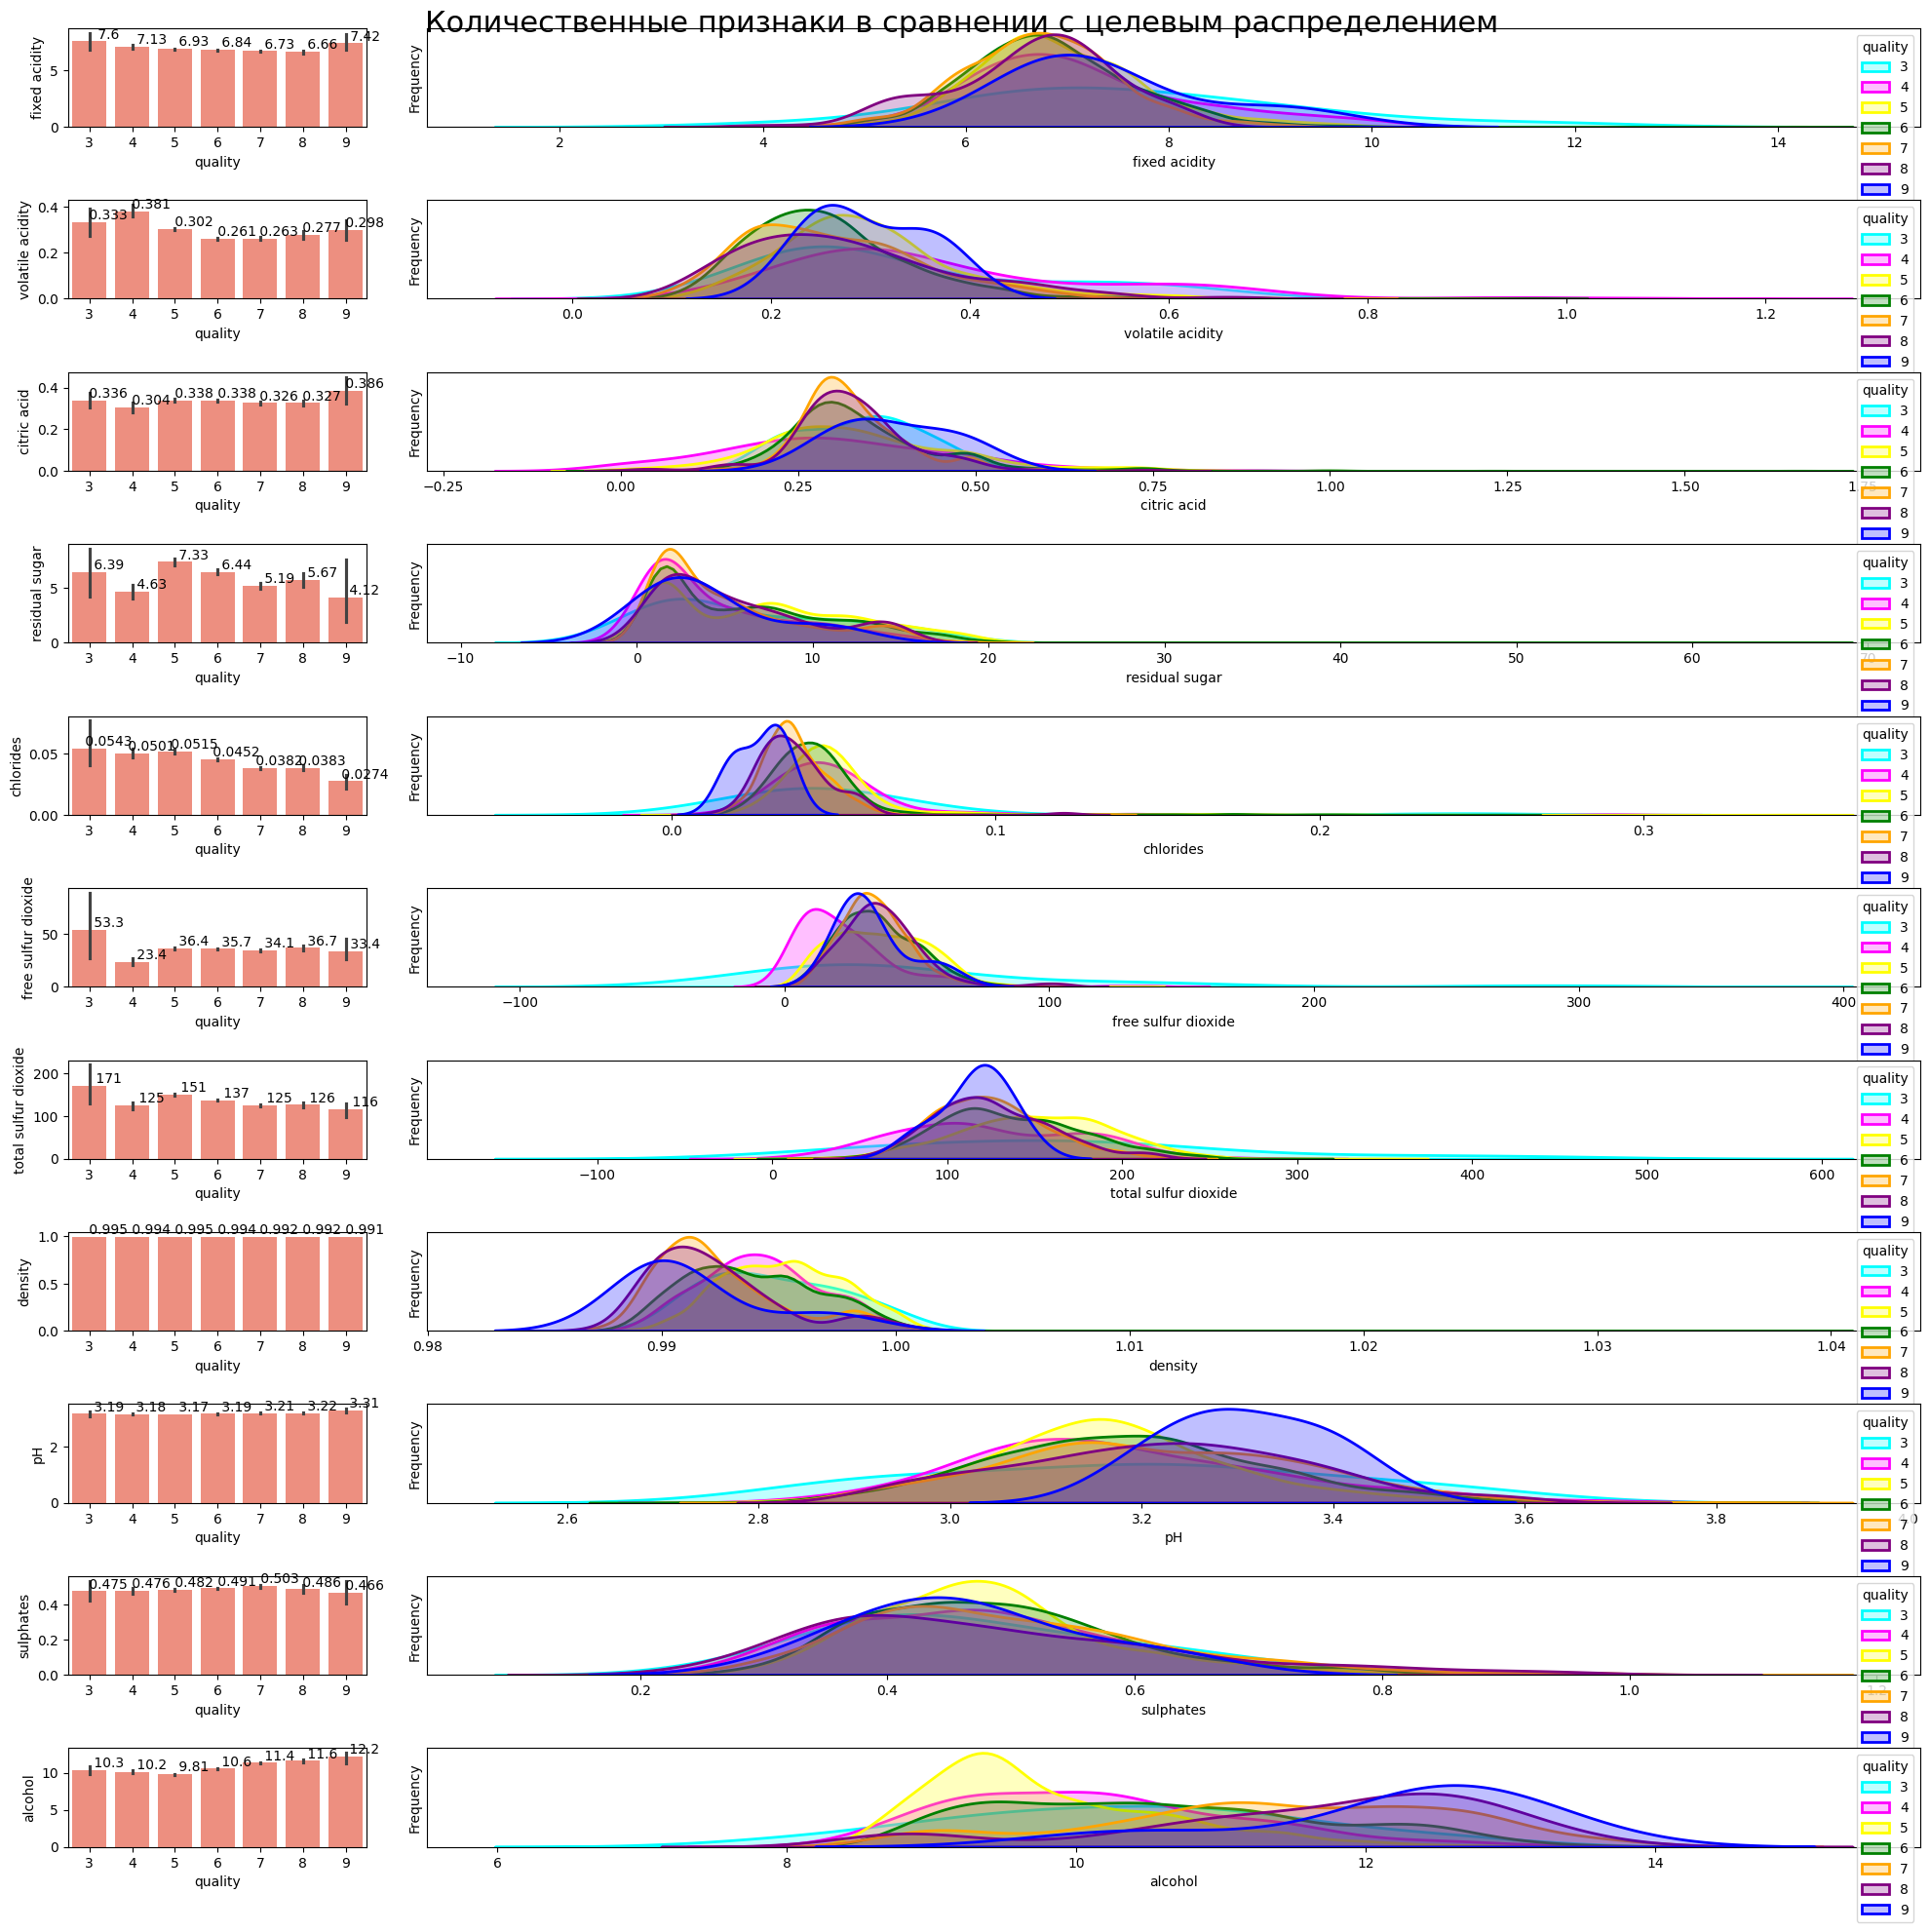

In [103]:
sns.set_palette(['#ff826e', 'red'])
continuous_features = [i for i in df_white.columns if i != 'quality']

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(20,20), gridspec_kw={'width_ratios': [1, 5]})

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(continuous_features):
    # Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_white, x="quality", y=col, ax=ax[i,0])

    # График KDE, показывающий распределение признака для каждой целевой категории
    sns.kdeplot(data=df_white[df_white["quality"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1', color = 'black')
    sns.kdeplot(data=df_white[df_white["quality"]==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2', color = 'red')
    sns.kdeplot(data=df_white[df_white["quality"]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3', color = 'cyan')
    sns.kdeplot(data=df_white[df_white["quality"]==4], x=col, fill=True, linewidth=2, ax=ax[i,1], label='4', color = 'magenta')
    sns.kdeplot(data=df_white[df_white["quality"]==5], x=col, fill=True, linewidth=2, ax=ax[i,1], label='5', color = 'yellow')
    sns.kdeplot(data=df_white[df_white["quality"]==6], x=col, fill=True, linewidth=2, ax=ax[i,1], label='6', color = 'green')
    sns.kdeplot(data=df_white[df_white["quality"]==7], x=col, fill=True, linewidth=2, ax=ax[i,1], label='7', color = 'orange')
    sns.kdeplot(data=df_white[df_white["quality"]==8], x=col, fill=True, linewidth=2, ax=ax[i,1], label='8', color = 'purple')
    sns.kdeplot(data=df_white[df_white["quality"]==9], x=col, fill=True, linewidth=2, ax=ax[i,1], label='9', color = 'blue')
    ax[i,1].set_yticks([])
    ax[i,1].set_ylabel('Frequency')
    ax[i,1].legend(title='quality', loc='upper right')

    # средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')


plt.suptitle('Количественные признаки в сравнении с целевым распределением', fontsize=22)
plt.tight_layout()
plt.show()

## Сделайте выводы о качестве данных и потенциальных взаимосвязях.
* не очень графики вышли, видимо не то сравнивал. Выоды соответственно тоже сомнительные
### Выводы:
Видно зависимости от Хлоридов (chlorides) - чем их больше тем меньше оценка и
 от алкоголя (alcohol) - чем больше алкоголя, тем выше оценкаю.

